# Import necessary libraries and load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import joblib

In [2]:
cr_loan = pd.read_csv('cr_loan2.csv')

In [3]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

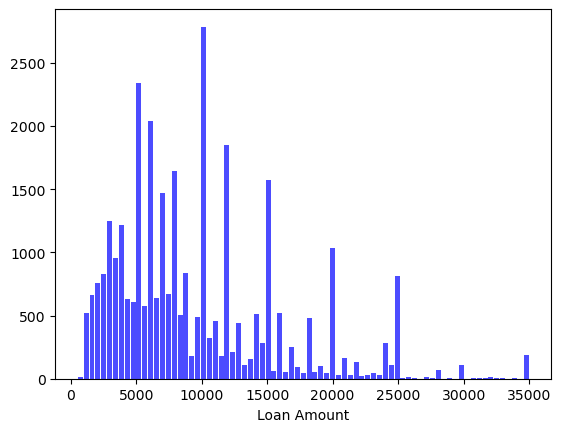

In [5]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

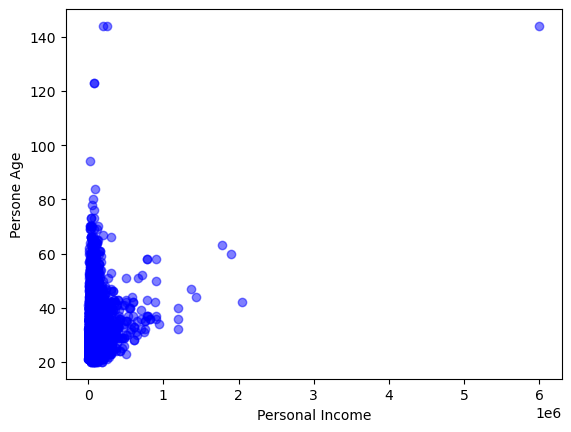

In [6]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [7]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [8]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [9]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


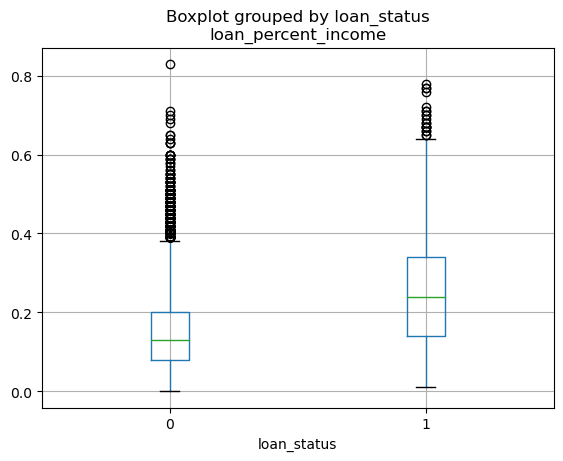

In [10]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.show()

In [11]:
 print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_int_rate'], aggfunc='mean').round(2))

loan_status                0      1
person_home_ownership              
MORTGAGE               10.06  13.43
OTHER                  11.41  13.56
OWN                    10.75  12.24
RENT                   10.75  12.97


In [12]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [13]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


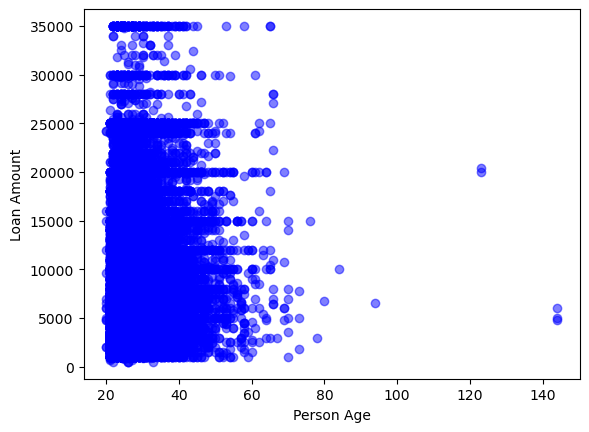

In [14]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

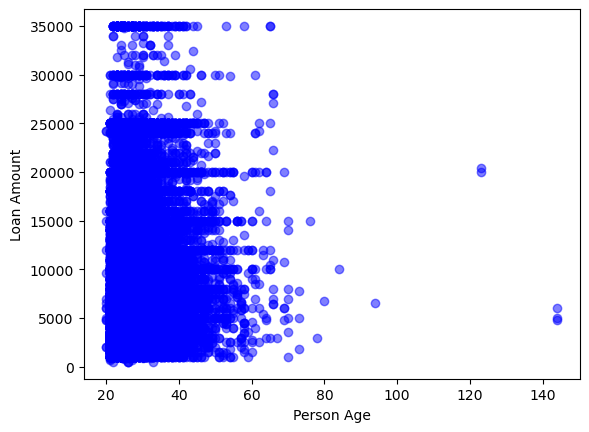

In [15]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [16]:
# Drop the record from the data frame and create a new one
cr_loan_new = cr_loan_new.drop(cr_loan_new[cr_loan_new['person_age'] > 100].index)

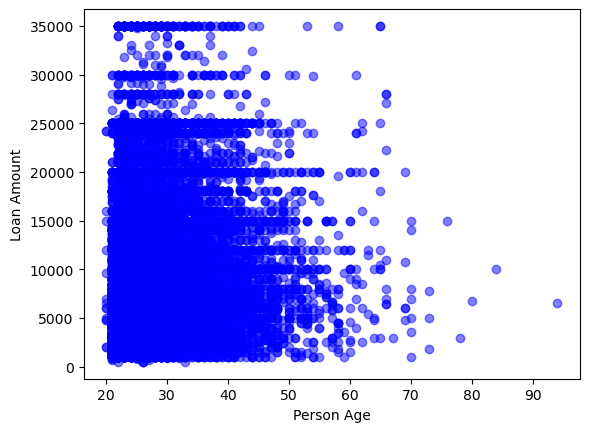

In [17]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [18]:
cr_loan_new.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [19]:
cr_loan_new['loan_int_rate'].fillna(cr_loan_new['loan_int_rate'].mean(), inplace=True)
cr_loan_new.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [20]:
indices = cr_loan_new[cr_loan_new['person_emp_length'].isnull()].index
cr_loan_new.drop(indices, inplace=True)
cr_loan_new.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [21]:
cr_loan_new.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [22]:
cr_loan_new.select_dtypes('object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [23]:
cr_loan_new['person_home_ownership'].value_counts()

RENT        16072
MORTGAGE    13090
OWN          2410
OTHER         107
Name: person_home_ownership, dtype: int64

In [24]:
cr_loan_new['loan_intent'].value_counts()

EDUCATION            6288
MEDICAL              5897
VENTURE              5553
PERSONAL             5367
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: loan_intent, dtype: int64

In [25]:
cr_loan_new['loan_grade'].value_counts()

A    10370
B    10183
C     6319
D     3555
E      952
F      236
G       64
Name: loan_grade, dtype: int64

In [26]:
cr_loan_new['cb_person_default_on_file'].value_counts()

N    26051
Y     5628
Name: cb_person_default_on_file, dtype: int64

In [27]:
cr_loan_new.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [28]:
df_num = cr_loan_new.select_dtypes(exclude=['object'])
df_cat = cr_loan_new.select_dtypes(include=['object'])
df_cat = pd.get_dummies(df_cat)
df_cat

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
32577,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
32578,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
32579,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [29]:
cr_loan_new = pd.concat([df_num, df_cat], axis=1)
cr_loan_new.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


# Train_test_split

In [30]:
X = cr_loan_new.drop('loan_status', axis=1)
y = cr_loan_new[['loan_status']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Logistic Regression

In [32]:
clf_logit = LogisticRegression(solver='lbfgs')
clf_logit.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [33]:
clf_logit.score(X_test, y_test)

0.8122895622895623

In [34]:
y_pred = clf_logit.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred, target_names = ['Non-Default', 'Default']))

              precision    recall  f1-score   support

 Non-Default       0.82      0.98      0.89      7512
     Default       0.73      0.17      0.27      1992

    accuracy                           0.81      9504
   macro avg       0.77      0.58      0.58      9504
weighted avg       0.80      0.81      0.76      9504



In [36]:
prob_default = clf_logit.predict_proba(X_test)
prob_default

array([[0.9576687 , 0.0423313 ],
       [0.57092905, 0.42907095],
       [0.52166165, 0.47833835],
       ...,
       [0.94536123, 0.05463877],
       [0.83444787, 0.16555213],
       [0.86102247, 0.13897753]])

In [37]:
prob_default = prob_default[:, 1]
prob_default

array([0.0423313 , 0.42907095, 0.47833835, ..., 0.05463877, 0.16555213,
       0.13897753])

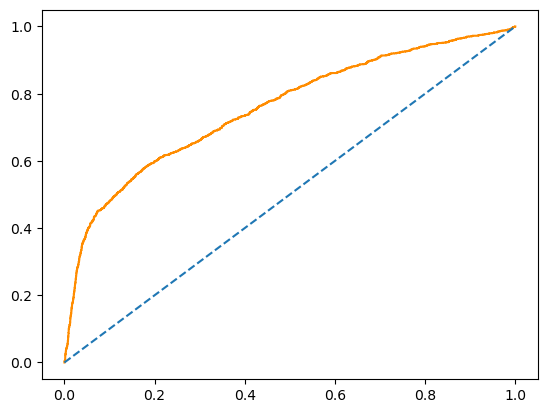

In [38]:
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [39]:
auc = roc_auc_score(y_test, prob_default)
auc

0.7564206506537331

In [40]:
confusion_matrix(y_test, y_pred)

array([[7387,  125],
       [1659,  333]], dtype=int64)

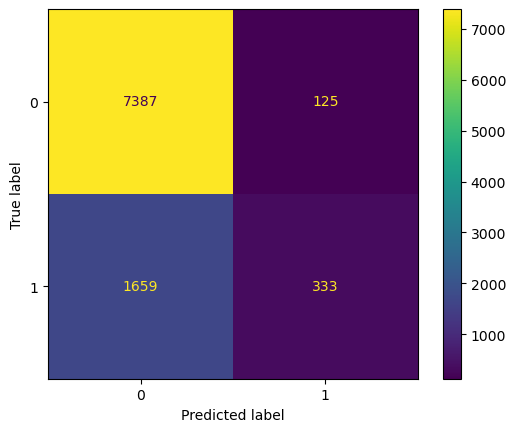

In [41]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=clf_logit.classes_).plot()
plt.show()

In [42]:
joblib.dump(clf_logit, 'model.joblib')

['model.joblib']

In [43]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
7626,24,93500,2.0,6400,13.230000,0.07,3,0,0,0,...,1,0,0,1,0,0,0,0,0,1
23,24,10980,0.0,1500,7.290000,0.14,3,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4874,26,42000,11.0,15075,12.920000,0.36,2,1,0,0,...,0,0,0,0,1,0,0,0,1,0
14629,22,48255,3.0,2000,6.760000,0.04,2,0,0,0,...,1,1,0,0,0,0,0,0,1,0
9647,26,51300,9.0,8400,11.990000,0.16,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,23,23040,0.0,2000,11.110000,0.09,3,0,0,1,...,1,0,1,0,0,0,0,0,1,0
3788,25,30000,4.0,4000,13.490000,0.13,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
25191,28,80569,2.0,4000,9.630000,0.05,7,1,0,0,...,0,0,1,0,0,0,0,0,1,0
14583,23,45000,3.0,2000,11.011529,0.04,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [44]:
cr_loan.shape

(32581, 12)